___
# Movie Recommendation System using Python
   [Dipan Sadekeen]

In [2]:
import numpy as np
import pandas as pd

In [62]:
rating = pd.read_csv('ratings.csv')

In [63]:
rating.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


Now let's get the movie titles:

In [64]:
movie = pd.read_csv("movies.csv")
movie.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


We can merge them together:

In [65]:
df = pd.merge(rating,movie,on='movieId')
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy



## Exploratory Data Analysis

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

Let's create a ratings dataframe with average rating and number of ratings:

In [67]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Karlson Returns (1970)                           5.0
Winter in Prostokvashino (1984)                  5.0
My Love (2006)                                   5.0
Sorority House Massacre II (1990)                5.0
Winnie the Pooh and the Day of Concern (1972)    5.0
Name: rating, dtype: float64

In [68]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Forrest Gump (1994)                 329
Shawshank Redemption, The (1994)    317
Pulp Fiction (1994)                 307
Silence of the Lambs, The (1991)    279
Matrix, The (1999)                  278
Name: rating, dtype: int64

In [69]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
'71 (2014),4.0
'Hellboy': The Seeds of Creation (2004),4.0
'Round Midnight (1986),3.5
'Salem's Lot (2004),5.0
'Til There Was You (1997),4.0


Now set the number of ratings column:

In [70]:
ratings['num of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())
ratings.head()

,rating,num of ratings
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


Now a few histograms:

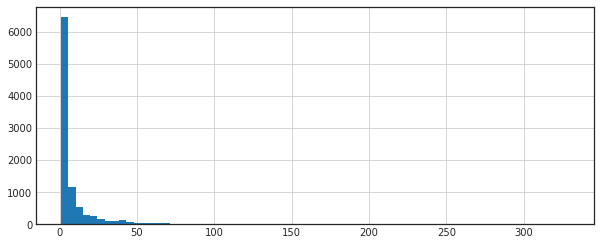

In [71]:
plt.figure(figsize=(10,4))
ratings['num of ratings'].hist(bins=70)

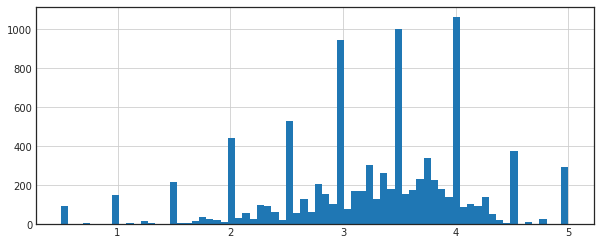

In [72]:
plt.figure(figsize=(10,4))
ratings['rating'].hist(bins=70)

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


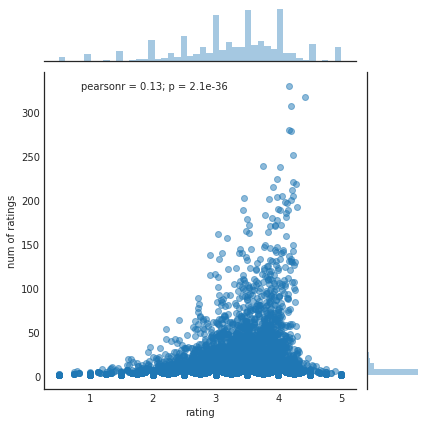

In [73]:
sns.jointplot(x='rating',y='num of ratings',data=ratings,alpha=0.5)

Okay! Now that we have a general idea of what the data looks like, let's move on to creating a simple recommendation system:

## Wider Pivot table

Now let's create a matrix that has the user ids on one access and the movie title on another axis. Each cell will then consist of the rating the user gave to that movie. Note there will be a lot of NaN values, because most people have not seen most of the movies.

In [74]:
wider_pivot = df.pivot_table(index='userId',columns='title',values='rating')
wider_pivot.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Most rated movie:

In [75]:
ratings.sort_values('num of ratings',ascending=False).head(10)

,rating,num of ratings
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278
Star Wars: Episode IV - A New Hope (1977),4.231076,251
Jurassic Park (1993),3.750000,238
Braveheart (1995),4.031646,237
Terminator 2: Judgment Day (1991),3.970982,224


Let's choose two movies: Jurassic Park (1993) And Schindler's List (1993).

In [76]:
ratings.head()

,rating,num of ratings
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


Now let's grab the user ratings for those two movies:

In [77]:
Jurassic_user_ratings = wider_pivot['Jurassic Park (1993)']
Schindler_user_ratings = wider_pivot['Schindler\'s List (1993)']
Jurassic_user_ratings.head()

userId
1    4.0
2    NaN
3    NaN
4    NaN
5    NaN
Name: Jurassic Park (1993), dtype: float64

We can then use corrwith() method to get correlations between two pandas series:

In [78]:
similar_to_Jurassic = wider_pivot.corrwith(Jurassic_user_ratings)
similar_to_Schindler = wider_pivot.corrwith(Schindler_user_ratings)

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/home/nbuser/anaconda3_420/lib/python3.5/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


Let's clean this by removing NaN values and using a DataFrame instead of a series:

In [79]:
corr_Jurassic = pd.DataFrame(similar_to_Jurassic,columns=['Correlation'])
corr_Jurassic.dropna(inplace=True)
corr_Jurassic.head()

,Correlation
title,
"'burbs, The (1989)",0.104077
(500) Days of Summer (2009),-0.125237
*batteries not included (1987),0.290929
...And Justice for All (1979),-0.981981
10 Cent Pistol (2015),-1.000000


Now if we sort the dataframe by correlation, we should get the most similar movies, however note that we get some results that don't really make sense. This is because there are a lot of movies only watched once by users who also watched star wars (it was the most popular movie). 

In [80]:
corr_Jurassic.sort_values('Correlation',ascending=False).head(10)

,Correlation
title,
In the Valley of Elah (2007),1.0
The Overnight (2015),1.0
Monkey Business (1952),1.0
"Cup, The (Phörpa) (1999)",1.0
Fear (1996),1.0
Feast (2005),1.0
Police Story 2 (Ging chaat goo si juk jaap) (1988),1.0
Insidious (2010),1.0
"Whistleblower, The (2010)",1.0


Let's fix this by filtering out movies that have less than 100 reviews (this value was chosen based off the histogram from earlier).

In [81]:
corr_Jurassic = corr_Jurassic.join(ratings['num of ratings'])
corr_Jurassic.head()

,Correlation,num of ratings
title,,
"'burbs, The (1989)",0.104077,17
(500) Days of Summer (2009),-0.125237,42
*batteries not included (1987),0.290929,7
...And Justice for All (1979),-0.981981,3
10 Cent Pistol (2015),-1.000000,2


Now sort the values and notice how the titles make a lot more sense:

In [82]:
corr_Jurassic[corr_Jurassic['num of ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,num of ratings
title,,
Jurassic Park (1993),1.000000,238
Outbreak (1995),0.533780,101
Ghostbusters (a.k.a. Ghost Busters) (1984),0.522286,120
"Fugitive, The (1993)",0.460603,190
Indiana Jones and the Temple of Doom (1984),0.456533,108


Now the same for the comedy Liar Liar:

In [83]:
corr_Schindler = pd.DataFrame(similar_to_Schindler,columns=['Correlation'])
corr_Schindler.dropna(inplace=True)
corr_Schindler = corr_Schindler.join(ratings['num of ratings'])
corr_Schindler[corr_Schindler['num of ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,num of ratings
title,,
Schindler's List (1993),1.000000,220
"Godfather, The (1972)",0.456661,192
Saving Private Ryan (1998),0.430103,188
"Shawshank Redemption, The (1994)",0.402202,317
"Godfather: Part II, The (1974)",0.402173,129
